In [23]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import random
import cv2
import os

# X_train and Y_train Process

In [2]:
DATADIR = '/home/vinicius/Documents/DataBase/Images_Dataset/Cat_x_Dog_with_numbers'
CATEGORIES = ['Cat','Dog']
IMG_SIZE = 80
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for image in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

100%|██████████| 3500/3500 [00:56<00:00, 61.89it/s]


In [3]:
random.shuffle(training_data)

x = []
y = []
for features, labels in training_data:
    x.append(features)
    y.append(labels)

X_train = np.array(x).reshape(-1, IMG_SIZE * IMG_SIZE).T

Y_train = np.array(y).reshape(1, -1)

print('#' * 70, '\n')
print('Nossa matriz vetorizada X_train tem tamanho: {}'.format(X_train.shape), '\n')
print('#' * 70, '\n')
print('Nossa matriz vetorizada Y_train tem tamanho: {}'.format(Y_train.shape), '\n')

###################################################################### 

Nossa matriz vetorizada X_train tem tamanho: (6400, 6985) 

###################################################################### 

Nossa matriz vetorizada Y_train tem tamanho: (1, 6985) 



# X_test and Y_test Process

In [4]:
DATADIR = '/home/vinicius/Documents/DataBase/Images_Dataset/Cat_x_Dog_with_numbers'
CATEGORIES = ['Cat_test','Dog_test']
IMG_SIZE = 80
testing_data = []

def create_testing_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for image in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
create_testing_data()

100%|██████████| 1500/1500 [00:16<00:00, 89.40it/s] 


In [5]:
random.shuffle(testing_data)

x = []
y = []
for features, labels in testing_data:
    x.append(features)
    y.append(labels)

X_test = np.array(x).reshape(-1, IMG_SIZE * IMG_SIZE).T

Y_test = np.array(y).reshape(1, -1)

print('#' * 70, '\n')
print('Nossa matriz vetorizada X_test tem tamanho: {}'.format(X_test.shape), '\n')
print('#' * 70, '\n')
print('Nossa matriz vetorizada Y_test tem tamanho: {}'.format(Y_test.shape), '\n')

###################################################################### 

Nossa matriz vetorizada X_test tem tamanho: (6400, 2997) 

###################################################################### 

Nossa matriz vetorizada Y_test tem tamanho: (1, 2997) 



# Normalizaion of input data

In [6]:
X_train = X_train / 255
X_test = X_test / 255

# Sigmoid Function for Forward Propagation

In [7]:
def sigmoid(Z):
    """
    Função de ativação da última camada para classificação binária. 
    
    Argumento: Z -> Valor de saída da camada.
    
    σ(Z) = σ(W * A + b) = 1 / 1 + e ^[−(WA+b)].
    
    Esta função retornará dois items: o valor de ativação "A" de mesmo 'shape' que o Z
    e a "cache" que irá conter o valor de Z.
    """
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    
    return A, cache

# RELU Function for Forward Propagation

In [8]:
def relu(Z):
    """
    Função de ativação das camadas ocultas, exceto a última camada.
    
    Argumento: Z -> Valor de saída da camada.
    
    A = RELU(Z) = max(0, Z).
    
    Esta função retorn adois items: o valor de ativação "A" de mesmo 'shape' que o Z e 
    a "cache" que irá conter o valor de Z.
    """
    A = np.maximum(0,Z)
    
    cache = Z 
    return A, cache

# Initialization

In [9]:
def initialize_parameters_deep(layer_dims):
    """
    Inicialização randômica dos parâmetros W[l] e inicialização com zeros dos 
    parâmetros b[l].
    
    Argumento: layer_dimensions -> python array (lista) contendo as dimensões de cada camada
    da nossa rede neural.
    
    Esta função irá retornar um dicionário contendo nossos parâmetros "W1", "b1", ..., "WL", "bL"
    
    Wl - parâmetro "peso" (weight) matriz de tamanho (layer_dimensions[l], layer_dimensions[l-1])
    bl - parâmetros "viés" (bias) matriz coluna (vetor) de tamanho (layer_dimensions[l], 1)
    
    A letra "l" refere-se à "layer".
    """
    #np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

# Pre-activation Parameter 

In [10]:
def linear_forward(A, W, b):
    """
    Argumento:
    A -> Valor de ativação da camada anterior, ou da camada de entrada, com tamanho: (tamanho da camada anterior, nº de exemplos).
    W -> paraêmtro "peso" (weights) sendo uma matriz numpy array de tamanho (tamanho da camada atual, tamanho da camada anterior).
    b -> parâmetro "viés" (bias) sendo um vetor numpy array de tamanho (tamanho da camada atual, 1).
    
    Esta função irá retornar o valor de Z, que é a entrada para a função de ativação, também chamado de 
    parâmetro de pré-ativação. Também retornará a cache, que é um dicionário contendo
    "A", "W" and "b".
    """
    Z = W.dot(A) + b
    
    cache = (A, W, b)
    
    return Z, cache

# Activation value of Forward Propagation

In [11]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Argumento:
    A_prev ->Valor de ativação dacamada anterior, ou da camada de entrada, de tamanho (tamanho da camada anterior, nº de exemplos).
    W - parâmetro "peso" (weights) sendo uma matriz numpy array de tamanho (tamanho da camda atual, tamanho da camda anterior).
    b - parâmetro "viés" (bias) sendo um vetor numpy array de tamanho (tamanho da camada atual, 1).
    activation -> a função de ativação que será usada nesta camada, armazenada como uma string: "sigmoid" or "relu".
    
    Essa função retornará "A" queo valor de saída da função de ativação, também chamado de valor de pós-ativação. 
    Também retornaráa "cache", um dicionário contendo as "linear_cache" e "activation_cache".
    """
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    cache = (linear_cache, activation_cache)

    return A, cache

# Forward propagation with L-layers

In [12]:
def L_model_forward(X, parameters):
    """
    Argumento:
    X -> dados de entrada, é uma numpy array de tamanho (tamanho da entrada, nº de exemplos).
    parameters -> saída da função "initialize_parameters_deep()".

    Essa função irá retornar o valor da última camada, a última ativação da rede neural, dado por "AL".
    Também irá retornar a "caches" que é uma lista contendo o cache da função "linear_activation_forward()"
    
    Para a RELU iremos percorrer um loop que vai da camada logo após a de entrada, até a penúltima camada,
    não irá pegar a camada L, pois nos índices da lista ele fica L - 1.
    """
    caches = []
    A = X
    L = len(parameters) // 2               
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
            
    return AL, caches

# Cost Function

In [13]:
def compute_cost(AL, Y):
    """
    Argumento:
    AL -> é o vetor correspondente às nossas previsões, tem tamanho (1, nº de exemplos).
    Y -> é o vetor que contém os rótulos (labels) verdadeiros, 
    por exemplo, temos 0 para gato, 1 para cachorro, tem tamanho (1, nº de examplos).

    Essa função irá retornar o valor da função de custo.
    """
    m = Y.shape[1]
    
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)    
    
    return cost

# Sigmoid Function for Backward Propagation

In [14]:
def sigmoid_backward(dA, cache):
    """
    Retro-propagação para uma unidade oculta com Sigmoid.
    
    Argumento:
    dA -> é o gradiente/derivada do valor de ativação.
    cache -> é onde armazenamos o Z que seria utilizado aqui.
    
    Essa função irá retornar o valor da derivada de Z, dada por dZ, para o cálculo do gradient descent.
    """
    Z = cache
    
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    
    return dZ

# Função RELU para Backward Propagation

In [15]:
def relu_backward(dA, cache):
    """
    Retro-propagação para uma unidade oculta com RELU.
    
    Argumento:
    dA -> é o gradiente/derivada do valor de ativação.
    cache -> é onde armazenamos o Z que seria utilizado aqui.
    
    Essa função irá retornar o valor da derivada de Z, dada por dZ, para o cálculo do gradient descent.
    """
    Z = cache
    dZ = np.array(dA, copy=True)  
    dZ[Z <= 0] = 0
    
    return dZ

# Derivative

In [16]:
def linear_backward(dZ, cache):
    """
    Argumento:
    dZ -> derivada da função de custo.
    cache -> uma tulpa contendo (A_prev, W, b) vindos da "forward propagation" na camada atual.

    Essa função retornará os valores:
    dA_prev -> gradiente/derivada da função de custo com o valor de ativação, mesmo 'shape' que A_prev.
    dW -> gradiente/derivada da função de custo com relação ao parametro W, mesmo 'shape' que W.
    db -> gradiente/derivada da função de custo com relação ao parametro b, mesmo 'shape' que b.
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

# Activation value of Backward Propagation

In [17]:
def linear_activation_backward(dA, cache, activation):
    """
    Argumento:
    dA -> gradiente/derivada daativação na camada atual.
    cache -> uma tupla com os valores (linear_cache, activation_cache) armazenados.
    activation -> a função de ativação utilizada na camada armazenadas como strings "sigmoid" ou "relu".

    Essa função retornará:
    dA_prev -> gradiente/derivada da funçãode custo com relaçãoà ativação, mesmo tamanho que A_prev.
    dW -> gradiente/derivada da função de custo com relação ao parametro W, mesmo 'shape' aque W.
    db -> gradiente/derivada da função de custo com relação ao parametro b, mesmo 'shape' aque b.
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

# Backward Propagation with L-layers

In [18]:
def L_model_backward(AL, Y, caches):
    """
    Argumento:
    AL -> é o vetor contendo as previsões na nossa "forward propagation" na função "L_model_forward()".
    Y -> é o vetor que contém os rótulos (labels) verdadeiros, 
    por exemplo, temos 0 para gato, 1 para cachorro, tem tamanho (1, nº de examplos).
    caches - uma lista com o conteúdo do cache
    todos os cache da "linear_activation_forward()" com "relu" (são os caches[l], "for l in range(L-1) i.e l = 0...L-2").
    os cache da "linear_activation_forward()" com "sigmoid" (são os caches[L-1]).

    Essa função retornará a "grads" que é um dicionário contendo as derivadas.
    """
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# Atualization

In [19]:
def update_parameters(parameters, grads, learning_rate):
    """
    Argumento:
    parameters -> dicionário contendo nossos parâmetros.
    grads -> dicionário contendo nossas derivadas, saída da "L_model_backward".

    Essa função retornará:
    parameters -> dicionário contendo os nossos parâmetros atualizados.
    """
    L = len(parameters) // 2 
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

# Model size

In [20]:
layers_dims = [X_train.shape[0], 20, 10, 8, 1] 

# Model

In [21]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.007, num_iterations = 3000, print_cost=False):
    """
    Argument0:
    X -> dados de entrada para treino, numpy array de tamanho (IMG_SIZE * IMG_SIZE, nº de exmplos).
    Y -> é o vetor que contém os rótulos (labels) verdadeirospara nosso treino, 
    por exemplo, temos 0 para gato, 1 para cachorro, tem tamanho (1, nº de examplos).
    layers_dims -> lista contendo o tamanho de cada camada.

    Essa função irá retornar "resultados" que é um dicionário contendo os valores que iremos utilizar.
    """
    #np.random.seed(1)
    costs = []                         
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
    
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
      
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.692913
Cost after iteration 100: 0.690440
Cost after iteration 200: 0.688588
Cost after iteration 300: 0.686989
Cost after iteration 400: 0.685126
Cost after iteration 500: 0.682988
Cost after iteration 600: 0.680800
Cost after iteration 700: 0.678326
Cost after iteration 800: 0.675865
Cost after iteration 900: 0.673293
Cost after iteration 1000: 0.670634
Cost after iteration 1100: 0.667977
Cost after iteration 1200: 0.665142
Cost after iteration 1300: 0.661972
Cost after iteration 1400: 0.658446
Cost after iteration 1500: 0.653959
Cost after iteration 1600: 0.648844
Cost after iteration 1700: 0.644055
Cost after iteration 1800: 0.645946
Cost after iteration 1900: 0.645294
Cost after iteration 2000: 0.643493
Cost after iteration 2100: 0.640920
Cost after iteration 2200: 0.639861
Cost after iteration 2300: 0.639575
Cost after iteration 2400: 0.636117
Cost after iteration 2500: 0.633438
Cost after iteration 2600: 0.632341
Cost after iteration 2700: 0.630557
Cost

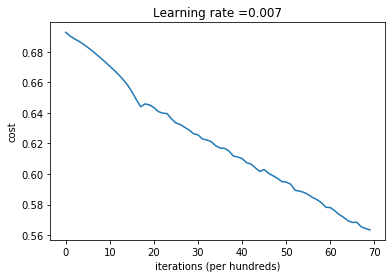

In [22]:
parameters = L_layer_model(X_train, Y_train, layers_dims, num_iterations = 7000, print_cost = True)

# Predicts

In [24]:
def predict(parameters, X):
    """
    As predições são feitas com base nos resultados da função de ativação, que gera os
    valores da matriz A que é de uma linha e m colunas, ela percorre cada valor
    das m colunas e verifica o valor presente nessa coluna de A.
    """
    m = X.shape[1]
    n = len(parameters) // 2
    Y_predict = np.zeros(shape = (1, m))
    probabilidade, cache  = L_model_forward(X, parameters)
    
    for i in range(probabilidade.shape[1]):       
        if probabilidade[0, i] > 0.5:
            Y_predict[0, i] = 1
        else:
            0
    return Y_predict

In [25]:
Y_prediction_test = predict(parameters, X_test)
Y_prediction_train = predict(parameters, X_train)
        
print('Acurácia treino: {} %'.format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
print('Acurácia teste: {} %'.format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

Acurácia treino: 70.1646385110952 %
Acurácia teste: 60.59392726059393 %


# Testing images

y = 0, você preveu ser "0.0


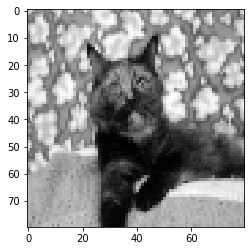

In [29]:
index = 91
plt.imshow(X_test[:,index].reshape((IMG_SIZE, IMG_SIZE)), cmap = 'gray')
print ("y = " + str(Y_test[0,index]) + ", você preveu ser \"" + str(Y_prediction_test[0,index]))

# Test your own image

O algoritmo previu sendo:  1


<function matplotlib.pyplot.show(*args, **kw)>

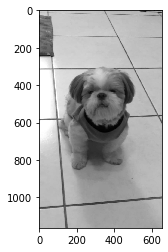

In [31]:
image = cv2.imread('my_image', cv2.IMREAD_GRAYSCALE)    #imagem deve estar na mesma pasta
image = image / 255
my_image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
teste = np.array(my_image).reshape(-1, IMG_SIZE * IMG_SIZE)
Imagem_final = teste.T
my_predicted_image = predict(parameters, Imagem_final)
print("O algoritmo previu sendo: ", int(np.squeeze(my_predicted_image)))
plt.imshow(image, cmap = 'gray')
plt.show

# Examples

layers_dims = [X_train.shape[0], 20, 20, 8, 3, 1] / 
learning_rate = 0.001 / 
num_iteration = 5000 / 
Acurácia treino: 58.46814602720114 % / 
Acurácia teste: 57.22389055722389 %

layers_dims = [X_train.shape[0], 20, 20, 20, 14, 8, 5, 3, 1] / 
learning_rate = 0.001 / 
num_iteration = 5000 / 
Acurácia treino: 56.134574087329995 % / 
Acurácia teste: 56.15615615615616 %

layers_dims = [X_train.shape[0], 20, 20, 14, 8, 1] / 
learning_rate = 0.01 / 
num_iteration = 5000 / 
Acurácia treino: 77.27988546886185 % / 
Acurácia teste: 59.45945945945946 %

layers_dims = [X_train.shape[0], 20, 20, 14, 8, 1] / 
learning_rate = 0.001 / 
num_iteration = 5000 / 
Acurácia treino: 62.60558339298497 % / 
Acurácia teste: 59.5261928595262 %

layers_dims = [X_train.shape[0], 20, 20, 14, 8, 1] / 
learning_rate = 0.006 / 
num_iteration = 5000 / 
Acurácia treino: 77.6521116678597 % / 
Acurácia teste: 61.59492826159493 %

layers_dims = [X_train.shape[0], 20, 12, 8, 3, 1] / 
learning_rate = 0.0075 / num_iteration = 5000 / Acurácia treino: 67.50178954903365 % / 
Acurácia teste: 60.69402736069402 %

layers_dims = [X_train.shape[0], 20, 20, 14, 8, 1] / learning_rate = 0.0075 / num_iteration = 5000 / Acurácia treino: 79.74230493915533 % / 
Acurácia teste: 62.12879546212879 %

layers_dims = [X_train.shape[0], 20, 10, 8, 1] / learning_rate = 0.007 / num_iteration = 7000 / Acurácia treino: 71.39584824624195 % / Acurácia teste: 60.7273940607274 %